In [1]:
# install pymongo if not installed

#! pip install pymongo==3.11.3

In [170]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# connect to local mongodb and database test
 
MONGO_HOST= 'mongodb://localhost:27017/test'

client = MongoClient(MONGO_HOST)

# select database
db=client['test']

#select the collection within the database
collection = db.climate_change

In [17]:
# disply first document in the collection
result=collection.find()
result[0]['text']

'RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…'

In [151]:
# create a pipeline to extract specific fields

pipeline =[
   {"$project": {
   "tweet_id": "$id_str",
    "created_at":1,
    "user_name":"$author.name",
    "user_screenName": "$author.username",
    "user_place": "$author.location",
    "text":1,
    "lang":1,
     "_id":0
  }
  }
]

result=collection.aggregate(pipeline)

result_list=[res for res in result]  # create an array to store the result

# convert result list into pandas data frame

result_pd = pd.DataFrame(result_list)

result_pd.head()

,created_at,lang,text,user_name,user_screenName,user_place
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advance...,thomas marino,thomasmarinojr,vancouver bc canada
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submittin...,AERE,AereOrg,The World
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about...,Catherine Martin 💙🧡,cathmartin59,NaN
4,2023-02-22T17:58:22.000Z,en,@sdubey03 studied environmental discourse on T...,Jenny Cole,drjennycole,"Lafayette, CO"


## Sentiment Analysis

In this next block of code we will cycle through all the tweets and score the tweet text using the VADER Sentiment library. See: https://pypi.org/project/vaderSentiment/

In [ ]:
#! pip install vaderSentiment==3.3.2

In [152]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sent(text):
    vader_sent=analyzer.polarity_scores(text)
    return vader_sent
    
result_pd['vader_sent']=result_pd['text'].apply(vader_sent)

In [153]:
result_pd.head()

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advance...,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound..."
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submittin...,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about...,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compou..."
4,2023-02-22T17:58:22.000Z,en,@sdubey03 studied environmental discourse on T...,Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [154]:
# Now let's change the setting so a print will show all of the columns, change the column max width so we can see the whole
# tweet, and show up to 100 rows
pd.set_option('display.max_columns', None) # This will make it so all columns appear when printing
pd.options.display.max_colwidth = 300  # This makes it so we can see the entire tweet text.
pd.set_option('display.max_rows', 10)

In [155]:
result_pd.head()

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}"
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submitting your work to this Special Issue if you have manuscripts related to #gender and #climate #ch…,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6625}"
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about the UK fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1531}"
4,2023-02-22T17:58:22.000Z,en,"@sdubey03 studied environmental discourse on Twitter. Climate is most common environmental issue, among communities with different orientations toward climate. Making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #SPSPSP23 https://t.co/fm73WbKPjZ",Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


## extract compound value for the VaderSentiment. 
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence.

In [156]:
result_pd['sentiment']=result_pd['vader_sent'].apply(pd.Series)['compound']

result_pd.head()

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent,sentiment
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}",0.2500
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submitting your work to this Special Issue if you have manuscripts related to #gender and #climate #ch…,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6625}",0.6625
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about the UK fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1531}",-0.1531
4,2023-02-22T17:58:22.000Z,en,"@sdubey03 studied environmental discourse on Twitter. Climate is most common environmental issue, among communities with different orientations toward climate. Making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #SPSPSP23 https://t.co/fm73WbKPjZ",Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [157]:
result_pd['sentiment'].mean()

-0.03145340157570924

In [158]:
result_pd['sentiment'].describe()

count    69556.000000
mean        -0.031453
std          0.479144
min         -0.992700
25%         -0.401900
50%          0.000000
75%          0.340000
max          0.999900
Name: sentiment, dtype: float64

In [159]:
# convert sentiment score to label
def sent_classify(score):
    if score>0.05:
        return "Positive"
    elif score<-0.05:
        return "Negative"
    else:
        return "Neutral"

result_pd['sentiment_label']=result_pd['sentiment'].apply(sent_classify)

In [161]:
result_sent=result_pd.groupby('sentiment_label')['sentiment_label'].count()
result_sent

sentiment_label
Negative    27701
Neutral     17581
Positive    24274
Name: sentiment_label, dtype: int64

In [162]:
result_sent2=result_sent.rename("totalTweets").reset_index()

result_sent2.head()

,sentiment_label,totalTweets
0,Negative,27701
1,Neutral,17581
2,Positive,24274


Text(0, 0.5, 'Number of Tweets')

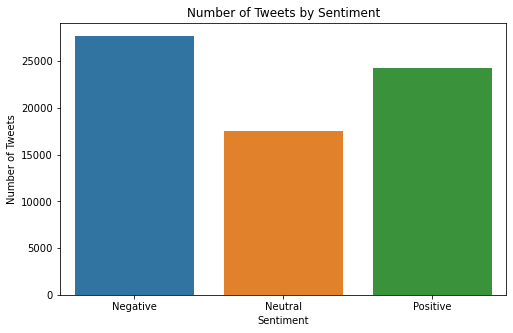

In [173]:
# visualize the result

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(8,5))

# use a color palette
palette=sns.color_palette("tab10")

# plot a bar chart
ax=sns.barplot(
    x="sentiment_label", 
    y="totalTweets", 
    data=result_sent2,
    palette=palette)

ax.set_title("Number of Tweets by Sentiment")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of Tweets")

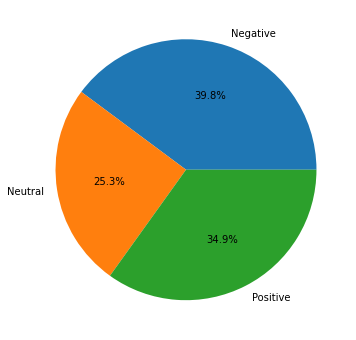

In [174]:
ax=result_sent2.set_index('sentiment_label').plot.pie(y='totalTweets', autopct="%1.1f%%", figsize=(6,6))

ax.set_ylabel("")

plt.legend().remove()

## Compare sentiment based on a few keywords

In [166]:
# Idenitfy whether a particular keyword appears in text and store the result in a dictionary

def identify_keywords(text, keyowrds):
    result={}
    for keyword in keywords:
        if keyword in text:
            result[keyword]='Yes'
        else:
            result[keyword]="No"
        
    return result

In [167]:
# apply the function to the whole dataset
# see whether the following keywords appear in tweets

keywords=['climatecrisis', 'climateaction', 'environment', 'sustainability']

result_pd['text_lower']=result_pd.text.str.lower()

result_pd['keywords']=result_pd.text_lower.apply(lambda x: identify_keywords(x, keywords))

In [168]:
keywords_list=result_pd['keywords'].apply(pd.Series)

In [169]:
result_pd2=pd.concat([result_pd, keywords_list], axis=1)

result_pd2.head(5)

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent,sentiment,sentiment_label,text_lower,keywords,climatecrisis,climateaction,environment,sustainability
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}",0.2500,Positive,rt @cdnunderwriter: new research using advanced technology suggests heavy oil facilities in alberta and saskatchewan are releasing almost f…,"{'climatecrisis': 'No', 'climateaction': 'No', 'environment': 'No', 'sustainability': 'No'}",No,No,No,No
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submitting your work to this Special Issue if you have manuscripts related to #gender and #climate #ch…,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6625}",0.6625,Positive,rt @val_mueller_asu: please consider submitting your work to this special issue if you have manuscripts related to #gender and #climate #ch…,"{'climatecrisis': 'No', 'climateaction': 'No', 'environment': 'No', 'sustainability': 'No'}",No,No,No,No
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,@hollyanndoan @environmentca utter bs!,"{'climatecrisis': 'No', 'climateaction': 'No', 'environment': 'Yes', 'sustainability': 'No'}",No,No,Yes,No
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about the UK fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1531}",-0.1531,Negative,rt @theurbanmagpie: if anyone is writing about the uk fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,"{'climatecrisis': 'No', 'climateaction': 'No', 'environment': 'No', 'sustainability': 'No'}",No,No,No,No
4,2023-02-22T17:58:22.000Z,en,"@sdubey03 studied environmental discourse on Twitter. Climate is most common environmental issue, among communities with different orientations toward climate. Making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #SPSPSP23 https://t.co/fm73WbKPjZ",Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,"@sdubey03 studied environmental discourse on twitter. climate is most common environmental issue, among communities with different orientations toward climate. making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #spspsp23 https://t.co/fm73wbkpjz","{'climatecrisis': 'No', 'climateaction': 'No', 'environment': 'Yes', 'sustainability': 'No'}",No,No,Yes,No


C:\Users\sli\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\sli\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\sli\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


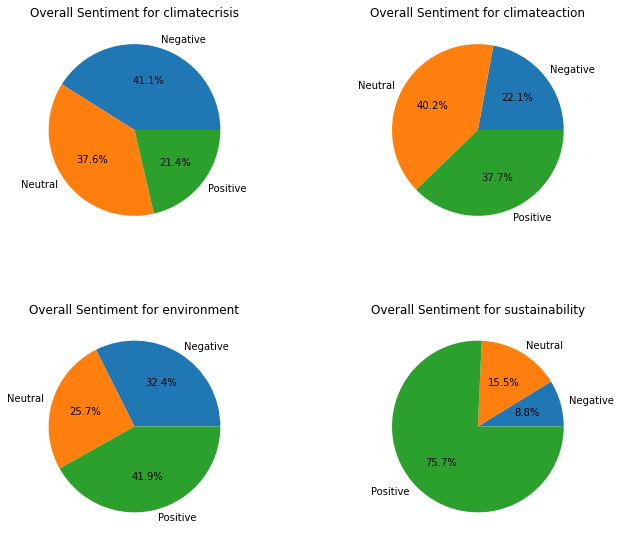

In [172]:
# visualize the result

keywords=['climatecrisis', 'climateaction', 'environment', 'sustainability']

i=1

fig = plt.figure(figsize=(20,20)) # define the size of the figure

fig.subplots_adjust(hspace=0.2, wspace=0.6)  #adjust the spacing between the plots

for keyword in keywords:
    plt.subplot(2,2,i)   # create a 2 by 2 subplot
    
    result=result_pd2[result_pd2[keyword]=='Yes'].groupby('sentiment_label')['sentiment_label'].count()
    df=pd.DataFrame(result)
    df.columns=['numTweets']
    ax=result.plot.pie(y='numTweets', autopct="%1.1f%%", figsize=(10,10))
    ax.set_ylabel("")
    plt.title("Overall Sentiment for " + keyword)
    plt.legend().remove()
    i=i+1


# Gender Guesser

In this section we will guess a persons gender based off of their first name. We split the name using the first space found into a first and last name.

In [58]:
# You only need to run this once then comment out the code.
!pip install gender_guesser

In [84]:
# This splits the name field into two different fields and saves it in a new dataframe
names = result_pd["user_name"].str.split(" ", n = 1, expand = True)
names.head(10)

,0,1
0,thomas,marino
1,AERE,None
2,Fitzy,None
3,Catherine,Martin 💙🧡
4,Jenny,Cole
5,DH,None
6,WATER,TO GO NORTH AMERICA
7,Mckenzie,Warren #The snake Sunak not my PM 🇬🇧👍
8,Ad,Tempus Invisibile
9,Daniel,None


In [93]:
# This creates a new field in the original dataframe using the first column in the names dataframe
result_pd['First'] = names[0]

result_pd.head()

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent,sentiment,sentiment_label,First
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}",0.2500,Positive,thomas
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submitting your work to this Special Issue if you have manuscripts related to #gender and #climate #ch…,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6625}",0.6625,Positive,AERE
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Fitzy
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about the UK fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1531}",-0.1531,Negative,Catherine
4,2023-02-22T17:58:22.000Z,en,"@sdubey03 studied environmental discourse on Twitter. Climate is most common environmental issue, among communities with different orientations toward climate. Making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #SPSPSP23 https://t.co/fm73WbKPjZ",Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Jenny


In [91]:
import gender_guesser.detector as gender

d = gender.Detector()

In [94]:
# check gender of the first 10 records

for index, row in result_pd[0:10].iterrows():
    print(row['First'], d.get_gender(row['First']))

thomas unknown
AERE unknown
Fitzy unknown
Catherine female
Jenny female
DH unknown
WATER unknown
Mckenzie female
Ad male
Daniel male


In [98]:
# to use gender guesser correctly, for first name, the first letter needs to be capital, the result should be in lower case

result_pd['First'] = names[0].str.lower().str.capitalize()

result_pd

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent,sentiment,sentiment_label,First
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}",0.2500,Positive,Thomas
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submitting your work to this Special Issue if you have manuscripts related to #gender and #climate #ch…,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6625}",0.6625,Positive,Aere
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Fitzy
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about the UK fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1531}",-0.1531,Negative,Catherine
4,2023-02-22T17:58:22.000Z,en,"@sdubey03 studied environmental discourse on Twitter. Climate is most common environmental issue, among communities with different orientations toward climate. Making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #SPSPSP23 https://t.co/fm73WbKPjZ",Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Jenny
...,...,...,...,...,...,...,...,...,...,...
69551,2023-02-24T19:09:01.000Z,en,"RT @FoxNewsMom: @RobertKennedyJr Oh God, not with the climate change again..\n\nWhat a damn scam.\n\nClimate Change,' the Green New Deal, and t…",Brian Carman,authorbncarman,"Texas, USA","{'neg': 0.225, 'neu': 0.702, 'pos': 0.074, 'compound': -0.6486}",-0.6486,Negative,Brian
69552,2023-02-24T19:09:01.000Z,en,@jordanbpeterson Do they have any actual science on climate change or is it like viroLIEgy?,3dom (Ali),3dom13,NaN,"{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}",0.3612,Positive,3dom
69553,2023-02-24T19:09:02.000Z,en,@dtrebucq @BarbadosStockEx @globalcompact @CaribbeanUN @UN_SDG @UNBdosandOECS @UNDPBarbadosEC @BarbadosChamber @CarmelLHaynes @BarbadosInvest thank you @dtrebucq for sharing this great news,Sanda Ojiambo,SandaOjiambo,"New York, USA","{'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.88}",0.8800,Positive,Sanda
69554,2023-02-24T19:09:03.000Z,en,"RT @PaulEDawson: UN secretary general @antonioguterres accused big oil companies of peddling 'the big lie', calling for them to be held acc…",Paul Delgatto - Old Yippie - SDS - Activist,fah451bks,"Las Vegas, NV","{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'compound': -0.296}",-0.2960,Negative,Paul


In [99]:
for index, row in result_pd[0:10].iterrows():
    print(row['First'], d.get_gender(row['First']))

Thomas male
Aere unknown
Fitzy unknown
Catherine female
Jenny female
Dh unknown
Water unknown
Mckenzie female
Ad male
Daniel male


In [100]:
# Let's rerun it and save the guessed gender back to the dataframe
genderguess = []

for index, row in result_pd.iterrows():
    genderguess.append(d.get_gender(row['First']))
    
result_pd['gender'] = genderguess

result_pd.head()

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent,sentiment,sentiment_label,First,gender
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}",0.2500,Positive,Thomas,male
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submitting your work to this Special Issue if you have manuscripts related to #gender and #climate #ch…,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6625}",0.6625,Positive,Aere,unknown
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Fitzy,unknown
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about the UK fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1531}",-0.1531,Negative,Catherine,female
4,2023-02-22T17:58:22.000Z,en,"@sdubey03 studied environmental discourse on Twitter. Climate is most common environmental issue, among communities with different orientations toward climate. Making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #SPSPSP23 https://t.co/fm73WbKPjZ",Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Jenny,female


<AxesSubplot:xlabel='gender', ylabel='sentiment'>

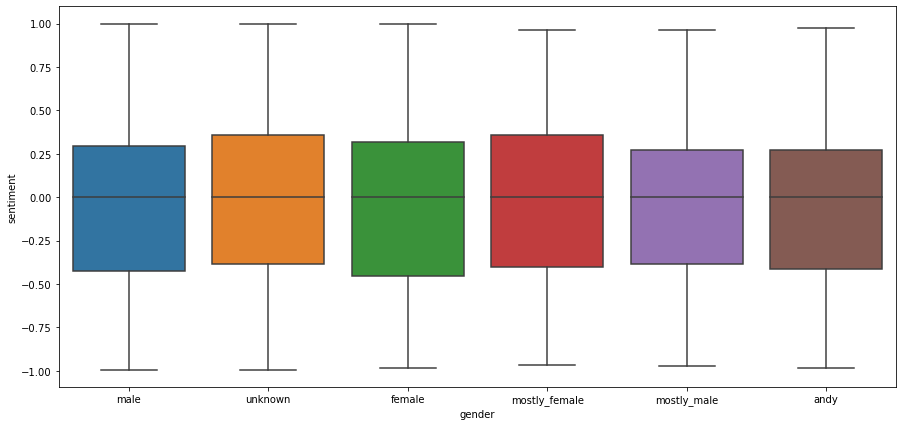

In [101]:
# let see whether sentiment differs by gender

# Set the figure size
plt.figure(figsize=(15, 7))


sns.boxplot(x='gender', y='sentiment', data=result_pd)

In [102]:
# save the result in a csv file at current directoy

result_pd.to_csv("climateChange.csv", sep="|", index=False)

In [103]:
df=pd.read_csv("climateChange.csv", sep="|")

In [104]:
df.head()

,created_at,lang,text,user_name,user_screenName,user_place,vader_sent,sentiment,sentiment_label,First,gender
0,2023-02-22T17:58:18.000Z,en,RT @CdnUnderwriter: New research using advanced technology suggests heavy oil facilities in Alberta and Saskatchewan are releasing almost f…,thomas marino,thomasmarinojr,vancouver bc canada,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}",0.2500,Positive,Thomas,male
1,2023-02-22T17:58:19.000Z,en,RT @Val_Mueller_ASU: Please consider submitting your work to this Special Issue if you have manuscripts related to #gender and #climate #ch…,AERE,AereOrg,The World,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6625}",0.6625,Positive,Aere,unknown
2,2023-02-22T17:58:20.000Z,en,@hollyanndoan @environmentca Utter bs!,Fitzy,Corndog65,KARMA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Fitzy,unknown
3,2023-02-22T17:58:21.000Z,en,RT @theurbanmagpie: If anyone is writing about the UK fruit and veg shortages and wants to speak to a farmer or supply chain expert on the…,Catherine Martin 💙🧡,cathmartin59,NaN,"{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1531}",-0.1531,Negative,Catherine,female
4,2023-02-22T17:58:22.000Z,en,"@sdubey03 studied environmental discourse on Twitter. Climate is most common environmental issue, among communities with different orientations toward climate. Making climate change more concrete (using planetary boundaries) can bridge this attitude-behavior gap. #SPSPSP23 https://t.co/fm73WbKPjZ",Jenny Cole,drjennycole,"Lafayette, CO","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Jenny,female


In [105]:
df.shape

(69556, 11)